# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit


# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
minimum_price = prices.min()
maximum_price = prices.max()
mean_price = prices.mean()
median_price = prices.median()
std_price = prices.std()

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,340.28


The CLT inner range: [$289,002.66 - $619,683.22]
1 StD $165,340.28
2 StD $330,680.56
3 StD $496,020.84
4 StD $661,361.12


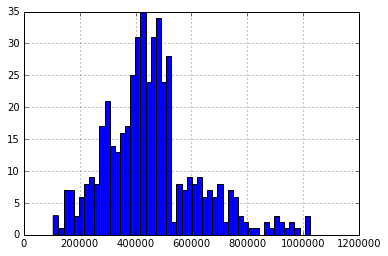

In [3]:
## Since our mean and median are close enough to each other, alhtough 
# our sample is only 489 points, I though it could be relevant to look 
# at our distribution

prices.hist(bins=50)


## And also to know these:
print "The CLT inner range: [${:,.2f} - ${:,.2f}]".format(454342.94 - 165340.28, 454342.94 + 165340.28)
print "1 StD ${:,.2f}".format(165340.28)
print "2 StD ${:,.2f}".format(165340.28 * 2)
print "3 StD ${:,.2f}".format(165340.28 * 3)
print "4 StD ${:,.2f}".format(165340.28 * 4)


## after running all these, turns out the distribution is a little 
# skewed to the first half of our values. It doesn't make too much 
# sense to aproach it using CLT. But just as a reference I still 
# left these here...

### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer:** 

The short answer, I would expect that RM to be positively correlated to MEDV but I would like to take a look at some other variable. I would expect both LSTAT and  to be highly correlated (negativelly) and PTRATIO also negatively correlated (but not as much as LSTAT, LSTAT would have a bigger impact). 

And here are my thoughts for each variable:

- **For RM**: I am not inclined to neither yes or no. Given that we are talking about the number of rooms, I think that something like the square feet area (or the usable square feet area) might have a bigger correlation to the MEDV than RM. If this was a question for a real project with a real client and I was asked, on the spot, to give an answer based on intuition on the spot I think that the usable square feet area would be a better variable. At least until we could really look in the data for some conclusions.

- **For LSTAT**: I would expect it to be highly negatively correlated with MEDV. Also, I think that if we assume it to be an open market with a constant supply and demand fluctuation, I think that this would be both a good candidate to infer cause from correlation but also really difficult to infer which of the two is the cause.

- **For PTRATIO**: Under the premise that more teachers for each student gives him/her the change to have a better education (and I have flipped the ratio around). I would expect a lower PTRATIO to have a higher MEDV. But only to a certain extent, because at a certain point maybe a ratio of 1000:200 or 1000:250 wouldn't be that important. So, I would expect PTRATIO to be somewhat negatively correlated to MEDV (but not with such an impact as LSTAT)


(as a sidenote, in question [question 10](#Question-10---Predicting-Selling-Prices) I ended up calculating the correlations for these variables and although I got the correct feeling here, the correlation for LSTAT is actually not as strong as I though initially)

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [4]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [5]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**
By definition, an R squared of 0.923 is a really good value. Close to 1, with an high goodness of fit. And by definition, the answer should be yes.

Although, a test sample of 5 is a really small sample. It would not be surprising to see the R Squared score to start to jitter to higher or lower values as we increased the sample size. In a scenario that we increased the sample and kept that same value, only then should we trust this model.


### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [20]:
from sklearn.cross_validation import train_test_split

## I always assumed that we only had to specify the test_size and the 
## train_size would be calculated as its complement.
## Since you explicitly told us both the split values for training and testing,
## I though that maybe I have been wrong in leaving train_size with default.
##
##
## This is what I found in the docs for test_size:
## "[...]If None, the value is automatically set to the complement of the train size. 
##If train size is also None, test size is set to 0.25. "


## what a relief! :)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=40)


# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: ** Well, I think we have two questions in here: should we test or not, and if we do it, should we split or not.

So, for the first part, in order to validate our assumptions, or to understand our errors as soon as possible, we should always test our work/our work's output. We should also always plan (both the time and the means) for the testing to take place.

When we are testing our algorithms we have two possibilities:
- **we don't split the dataset**, and in that case, for the testing we are just feeding the algorithm with something that it already processed during the training. I think this might be as bad as not testing or at the least be as relevant as not testing
- **we split the dataset**, and that way we can see how the algorithm handles new data before we need to get another sample from the real worl, or from our production environment. This is great, because it minimizes our risk of failure and it helps us correct wrong assumptions or errors that migh have occured during the process. Of course that there might be a problem with the split technique which [K-Fold Cross validation tries to mitigate](#Question-8---Cross-Validation)

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

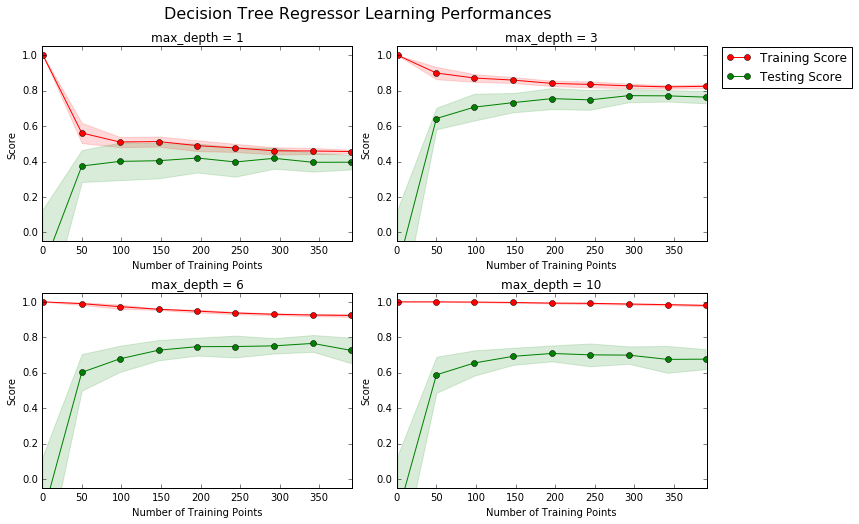

In [7]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: ** (regarding max depth = 6)
The training curve starts at 1 and then starts deteriorating and seems to converge somewhere around 0.9.
The testing curve starts at 0 and then starts to improve and converges somewhere around 0.7. 

I think it is really unlikelly that it changes since we are seeing this convergences and the plot is showing us the scores for as much as 400 training points in a dataset of 489 points total.

Even if we were considering some other problem (and somehow still observed this same convergence) unless it was a problem space so vast that a series of samples with 400  points were never enough to represent the entire problem's population I would still assume it to be unlikelly.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

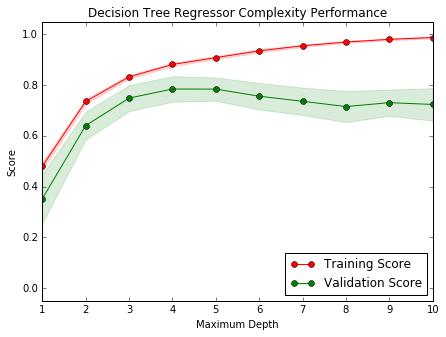

In [8]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: ** With a maximum depth of 1 the problem suffers from high bias. We can identify this because no matter what, we can only get a score of (more or less) 0.5 in our training score, and our validation score is also close enough to it.
On the depth equal to 10 scenario, the problem suffers from high variance, since despite the training score being quite high, there is a big gap between that and the validation score.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: ** I would choose max_depth=3. 

From the complexity chart, at depth 3 it looks like we minimize the gap between the curves with a somewhat "high enough" training score (above 0.8). Maybe another candidate from here could be max_depth=4.

But from the learning curves charts I also got the feeling that max_depth=3 is a better candidate, since the training and the testing curves converge closer to each other.

In order to see the learning curves for some of the same max_depth that we have in the complexity chart, I changed the ModelLearning function in order to pass it different max_depth values for the learning curves. (those are the renderings in the code cells bellow)

What I was able to observe was that both max_depth=4 and max_depth=3 are quite simillar. But, since the curves converge a little bit sooner in max_depth=3, I'm still keeping it as a better candidate value for the parameter.

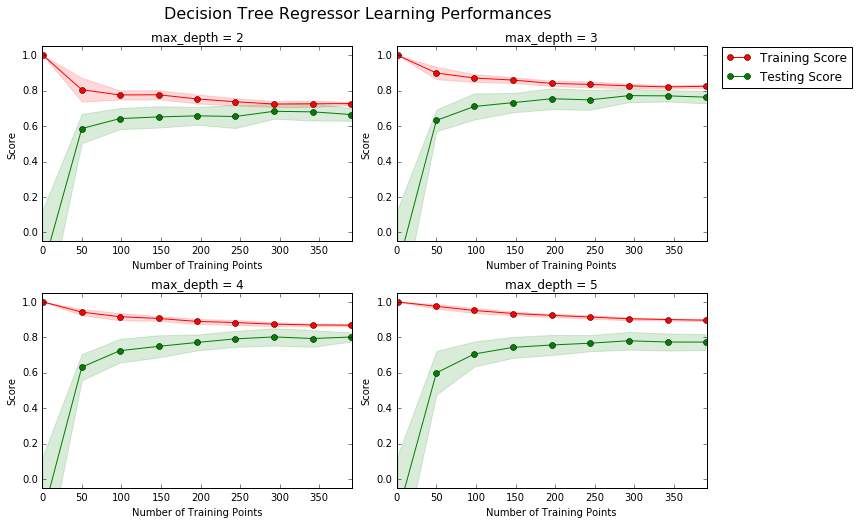

In [9]:
### this code cell was not here
### I added a third optional parameter to vs.ModelLearning so that I could see what the learning for other values looked like.
vs.ModelLearning(features, prices, [2,3,4,5])

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: ** The Grid Search algorithm lets us specify a set of paremeters for tuning and a set of values for those same parameters. After that, it tries diferent combinations to find and return which set of parameter-values has the best performance.


### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: ** K fold cross validation lets us split our data into k bins. And run k train + testing iterations. In each iteration the algorightm uses a diferent bin for testing. 

The benefit of all this is that in the end of all iterations, all of the data has been used in either training or testing. There is no definitive "left outs" for training or "left outs" for testing.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [10]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV


def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    regressor = DecisionTreeRegressor(random_state=123123)

    params = {"max_depth": [1,2,3,4,5,6,7,8,9,10]}

    scoring_fnc = make_scorer(performance_metric)

    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [11]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: ** In question 6, I wondered about max_depth=4 but stuck with my first guess. I'm not completelly surprised by this. But I do wonder if there was any major flaw in my reasoning after comparing the charts of max_depth=3 vs max_depth=4.

(Could this be something to ask around the foruns? Or is it bad in any way to tell other fellow students that might not have yet completed the project about these results?)

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [12]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3


# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $411,096.00
Predicted selling price for Client 2's home: $219,961.54
Predicted selling price for Client 3's home: $955,500.00


In [ ]:
## Before answering, just as a refresher...

## these were the stats:
##   Minimum price: $105,000.00
##   Maximum price: $1,024,800.00
##   Mean price: $454,342.94
##   Median price $438,900.00
##   Standard deviation of prices: $165,340.28


## And these are the min and max MEDV records
print ("max:")
print data[data["MEDV"] == data["MEDV"].max()]
print ""
print ""
print ("(min)")
print data[data["MEDV"] == data["MEDV"].min()]


## THE MAX MEDV RECORD:
##     RM  LSTAT  PTRATIO     MEDV
##  8.398   5.91       13  1024800

## THE MIN MEDV RECORDs:
##        RM  LSTAT  PTRATIO    MEDV
##     5.453  30.59     20.2  105000
##     5.683  22.98     20.2  105000

print("\n\n")
## So, as a rule of thumb, we are inside the min-max ranges, so everything
#seems fine.

##However, I did notice that between client 1 and 2, the LSTAT does not 
# behave quite as I was expecting in question 1.
# And although it is a bit off to this question, I figured I would 
# actually look at each variable correlation. 
# 

print("Vars. Correlations:")
data.corr()["MEDV"]

#Vars. Correlations:
#RM         0.697209
#LSTAT     -0.760670
#PTRATIO   -0.519034
#MEDV       1.000000
#Name: MEDV, dtype: float64

#(I ran this cell, copied the values and then cleared the output,
# I though it would be easier to read this way)


**Answer: ** I don't think any of these results are shocking for the data that we are feeding in. We just got bigger prices for bigger houses in with better PTRATIOs. Despite not having always a richer neighborhood (between client 1 and 2).

If we had nothing else, we've got a record similar enough to the top MEDV price and it got predicted a value closer to our upper range. Another similar enough to the bottom MEDV and got closer to our bottom range. And finnaly a record close to the mean value.

So, assuming that this was a real scenario, and **only the scope of this question**, I would recomend the predicted values to each client.


In [35]:
#### Since the data for question 10 is a bit "too consistent" I tried out some other options just for fun, 
# to see what the model would predict

# Produce a matrix for the new clients data
client_data = [[10, 17, 15], 
               [5, 4, 22], 
               [6, 2, 22], 
               [8, 3, 2]]

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)


Predicted selling price for Client 1's home: $411,096.00
Predicted selling price for Client 2's home: $501,836.36
Predicted selling price for Client 3's home: $501,836.36
Predicted selling price for Client 4's home: $411,096.00
Predicted selling price for Client 5's home: $955,500.00


In [36]:
# These outputs vs the ones from the question 10 got me thinking. And I started looking into the DecisionTreeRegressor
# At first, I was expecting to see something inside our range, but I also expected little tweaks on the input features 
# to show a little variance on the output predictions.

# I found and read these:
#http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
#http://stackoverflow.com/questions/35576272/classification-with-numerical-label/35594396
#http://www.saedsayad.com/decision_tree_reg.htm
#http://www.simafore.com/blog/bid/62482/2-main-differences-between-classification-and-regression-trees
#https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/

# I decided to leave my conclusions on the answer to question 11.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [15]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $976,800.00
Trial 4: $969,850.00
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $835,800.00
Trial 8: $979,300.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $627,722.39


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: ** 

*Before getting to my anwser, I kind of went through 2 phases during this question and question 10, and went a little back and forth with the two of them. Also, I'm sorry this got a bit long.*


I dont think I would use our model in a real-world setting and here is my take on each of the proposed hints:
- for me, with data only from 1978 we have no way of telling if this data is still relevant. If we had data from 1978 until now, or something from 1978 to 1983 or 88, then I we would be able to understand by how much this 'old' data is still relevant. 

- I can think of some more features that would be nice to know. For example, the year the home was built, the square feet areas, a built-vs-usable areas ratio, how many owners purchased the house previously and distance to transportation facilities just to name a few. Obviously, the set of features present on the original dataset are also relevant

- I don't think it is robust enough. We have a not too big of a data set, with data from 1 year about 1 city. I think that our sample is not representative of the population and is also too small. The range I got in the Sensitivity section (627,722.39) varies way too much for the same house. It varies in more than 3 standard deviations (in value, and not from the mean) and gets almost everywhere around the map according to the statistics that we calculated in the first section.

- To discover some trends and correlations yes. To effeciently predict an house price, I am not so sure.


So, until this point, what I just wrote was basically my feeling torwards our scenario BEFORE digging into some specifics of the DecisionTreeRegressor.

To be honest, up until question 10, I just went through the questions without giving too much thought about what I was being asked to do. 

I did get a bit surprised when I saw that we were using DecisionTreeRegressor instead of the classifier, but then just thought it normal, since we were looking for a price (which is continuous) instead of a label (which would be discrete). However, as I stated in a comment above, when I tried out the regressor with different values I guess I was expecting some variance in the inputs to also present some kind of variance in the outputs.

Maybe my assumption was way too naive even with the knowledge that I already had. Because I've been through the exercises and the classes, and also have been understanding the examples... But in my head up until now I was still expecting a Classifier to give me labels and a regressor to give me "partioned regressions" (something like, litteraly various regression functions).


So, after giving it some real thought and after reading a bit about it, I now got that the output of the regressor is suposed to be interpreted as the range where our prediction falls. With this in mind I think that our model is even less suitable for a real world problem. Since it did find some ranges for us, but it would not be feasible to present this to a customer and stand behind all of it just because "it has the perfect bias-variance tradeoff, is not overfitted, and gave us these ranges". In a real world scenario, we should present something with an output that we can understand what it is. Or have no doubts how to compare it to our or our audience's previous knowledge.

We could obviously use this for some of our iterations until we figured out what kind of output ranges would be acceptable. Then we should validate those ranges with our customer, infer a new feature in our data, and only then (assuming a Decision Tree to be a valid candidate) we should use a DecisionTreeClassifier as our final model to classify torwards that new validated/customer-acceptable feature.
